<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-23 06:41:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  31.6MB/s    in 1.1s    

2024-06-23 06:41:06 (31.6 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [218]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
type(conn.cursor())

sqlite3.Cursor

Import pandas module.


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [140]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [139]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [9]:
#list of all column names for specified table
looking_for = 'ConvertedComp'
table_name = 'master'

QUERY = """SELECT name FROM PRAGMA_TABLE_INFO('{}')
""".format(table_name)

df_cols = pd.read_sql_query(QUERY,conn)
print(df_cols['name'].values)

['index' 'Respondent' 'MainBranch' 'Hobbyist' 'OpenSourcer' 'OpenSource'
 'Employment' 'Country' 'Student' 'EdLevel' 'UndergradMajor' 'OrgSize'
 'YearsCode' 'Age1stCode' 'YearsCodePro' 'CareerSat' 'JobSat' 'MgrIdiot'
 'MgrMoney' 'MgrWant' 'JobSeek' 'LastHireDate' 'FizzBuzz' 'ResumeUpdate'
 'CurrencySymbol' 'CurrencyDesc' 'CompTotal' 'CompFreq' 'ConvertedComp'
 'WorkWeekHrs' 'WorkRemote' 'WorkLoc' 'ImpSyn' 'CodeRev' 'CodeRevHrs'
 'UnitTests' 'PurchaseHow' 'PurchaseWhat' 'OpSys' 'BlockchainOrg'
 'BlockchainIs' 'BetterLife' 'ITperson' 'OffOn' 'SocialMedia'
 'Extraversion' 'ScreenName' 'SOVisit1st' 'SOVisitFreq' 'SOFindAnswer'
 'SOTimeSaved' 'SOHowMuchTime' 'SOAccount' 'SOPartFreq' 'SOJobs'
 'EntTeams' 'SOComm' 'WelcomeChange' 'Age' 'Trans' 'Dependents'
 'SurveyLength' 'SurveyEase']


In [10]:
#quick check if column exist in specific table (sqlite3 pragma)
looking_for = 'ConvertedComp'
table_name = 'master'

QUERY = """SELECT 1 FROM PRAGMA_TABLE_INFO('{}') WHERE name='{}'
""".format(table_name, looking_for)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

1


In [219]:
#finding desired column through all sqlite3 database
looking_for = 'ConvertedComp'

QUERY_LIST = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
tables_list = pd.read_sql_query(QUERY_LIST,conn).squeeze()

for table in tables_list:
    QUERY = """SELECT name FROM PRAGMA_TABLE_INFO('{}')
""".format(table)
    df = pd.read_sql_query(QUERY, conn)
    try:
        if looking_for in df['name'].values:
            print(f"table {table} consist column {looking_for}")
            r_table = table    # for later references
    except:
        print(f"Not this table:{table}")
        pass





table master consist column ConvertedComp


In [220]:
#RELOAD DB
QUERY = """
SELECT * from '{}'
""".format(r_table)

df = pd.read_sql_query(QUERY, conn)


In [18]:
df['WorkWeekHrs'][df['WorkWeekHrs'] > 100].value_counts()

375.0     27
160.0     20
168.0     19
385.0      8
150.0      4
140.0      2
475.0      1
1012.0     1
113.0      1
355.0      1
145.0      1
130.0      1
425.0      1
165.0      1
Name: WorkWeekHrs, dtype: int64

In [19]:
df.shape

(11398, 63)

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


Text(0.5, 1.0, 'Compensation to its frequency in data')

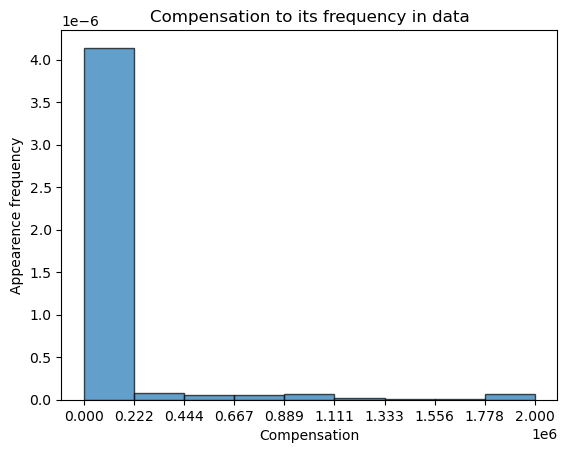

In [20]:
# your code goes here
bins = np.linspace(df['ConvertedComp'].min(), df['ConvertedComp'].max() ,10)
df['ConvertedComp'].plot(kind='hist', bins=bins, xticks=bins, density=True, alpha=0.7, edgecolor = 'black')
plt.xlabel('Compensation')
plt.ylabel('Appearence frequency')
plt.title('Compensation to its frequency in data') 


### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

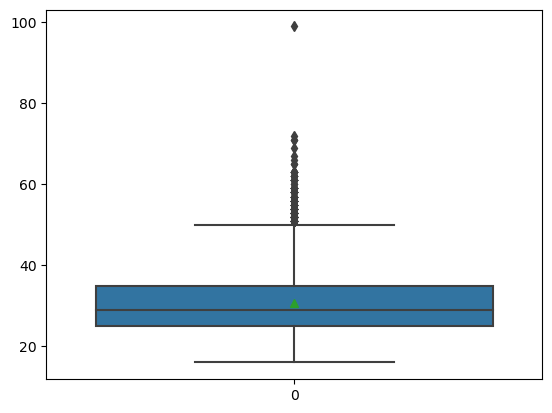

In [21]:
# your code goes here
sns.boxplot(data=df['Age'], showmeans=True)


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='Age'>

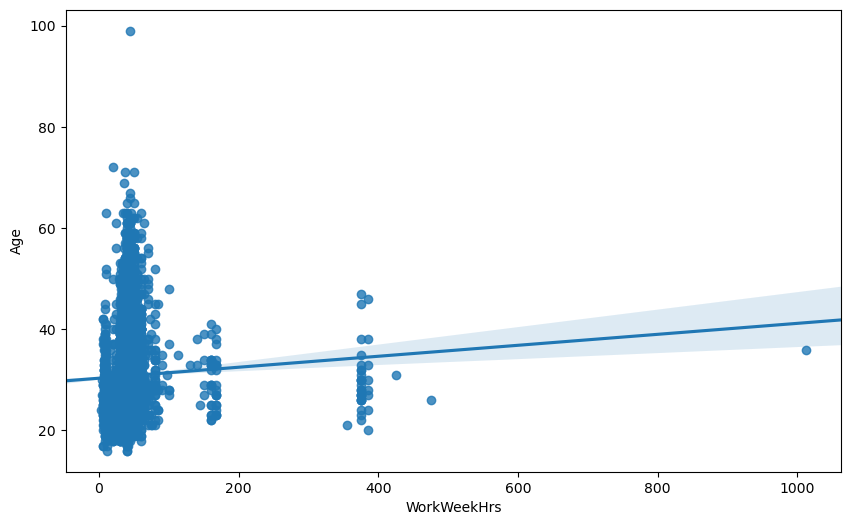

In [22]:
# your code goes here
plt.figure(figsize=(10,6))
sns.regplot(data=df, y='Age', x='WorkWeekHrs')



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [23]:
df['Age_normalized'] = ((df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min()))

In [24]:
df['Age_normalized'].head(5)

0    0.072289
1    0.084337
2    0.144578
3    0.120482
4    0.156627
Name: Age_normalized, dtype: float64

<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

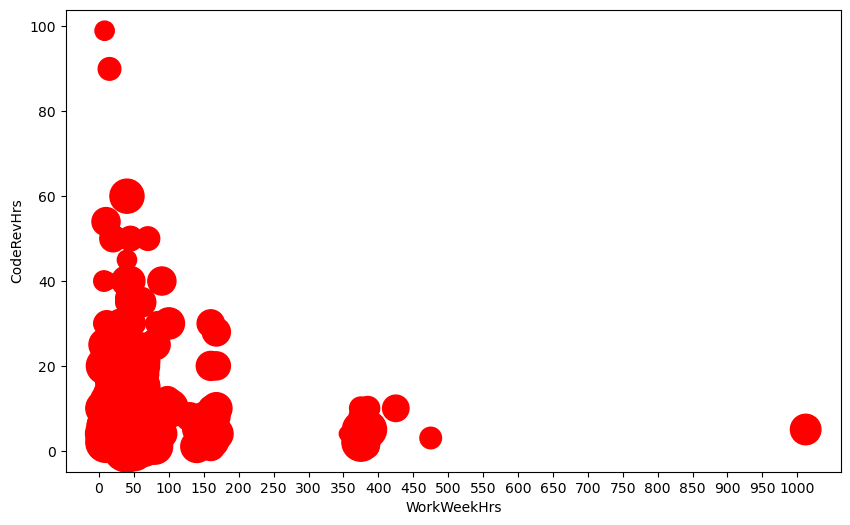

In [25]:
# your code goes here
df.plot(kind='scatter',
        figsize = (10,6),
        y='CodeRevHrs',
        x='WorkWeekHrs',
        xticks = range(0, 1001, 50),
        s=df['Age_normalized'] * 2000,
        color='red'
       )
        


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [26]:
df.loc[:5, df_cols.loc[0:65,:].squeeze().to_list()] #slicing to manual check columns

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
5,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,31.0,No,Yes,Too long,Easy


In [160]:
r_table = 'LanguageDesireNextYear'
QUERY = """
SELECT * from '{}'
""".format(r_table)

df = pd.read_sql_query(QUERY, conn)


In [143]:
df.drop(columns='Respondent', inplace=True)
df.head(5)

,LanguageDesireNextYear
0,C
1,C#
2,JavaScript
3,SQL
4,Bash/Shell/PowerShell


In [208]:
r_table = 'DevType'
QUERY = """
SELECT * from '{}'
""".format(r_table)

df = pd.read_sql_query(QUERY, conn)
df.groupby('DevType').count().sort_values(by='Respondent', ascending=False)

,Respondent
DevType,
"Developer, full-stack",6928
"Developer, back-end",6290
"Developer, front-end",3920
"Developer, desktop or enterprise applications",2575
"Developer, mobile",1959
DevOps specialist,1639
Database administrator,1413
System administrator,1202
Designer,988


Text(0, 0.5, '')

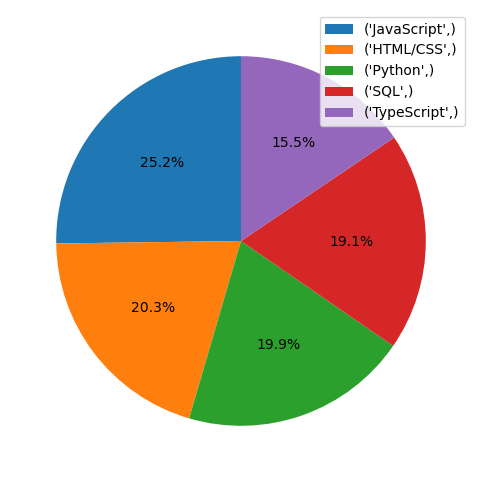

In [146]:
top5_lang = df.value_counts().sort_values(ascending=False).head(5)
top5_lang.plot(kind='pie',
                       autopct='%1.1f%%',
             figsize=(10,6),
            startangle=90,
            labels=None)
plt.legend(labels=top5_lang.index)
plt.ylabel(None)

In [161]:
r_table = 'LanguageWorkedWith'
QUERY = """
SELECT * from '{}'
""".format(r_table)

df = pd.read_sql_query(QUERY, conn)


In [187]:
df.head(5)

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite


In [163]:
(df['LanguageWorkedWith'] == 'SQL').sum()

7106

In [191]:
r_table = 'DatabaseWorkedWith'
QUERY = """
SELECT * from '{}'
""".format(r_table)

df = pd.read_sql_query(QUERY, conn)

In [192]:
df_dup = df[df['Respondent'].duplicated()]
list_to_drop = df_dup['Respondent'].unique().tolist()

In [193]:
clean = df[~df['Respondent'].isin(list_to_drop)]

In [196]:
(clean['DatabaseWorkedWith'] == 'MySQL').sum()

474

In [190]:
r_table = 'DatabaseDesireNextYear'
QUERY = """
SELECT * from '{}'
""".format(r_table)

df = pd.read_sql_query(QUERY, conn)

In [68]:
df.drop(columns='Respondent', inplace=True)
df.head(5)

,DatabaseDesireNextYear
0,MySQL
1,SQLite
2,PostgreSQL
3,Redis
4,SQLite


In [71]:
top5_db = df.value_counts().sort_values(ascending=False).head(5)
top5_db = top5_db.to_frame().T

In [107]:
my_list = []
for item in top5_db.columns.tolist():
    item = item[0]
    item.replace(r'[()]','')
    my_list.append(item)
    
my_list

['PostgreSQL', 'MongoDB', 'Redis', 'MySQL', 'Elasticsearch']

Text(0, 0.5, '')

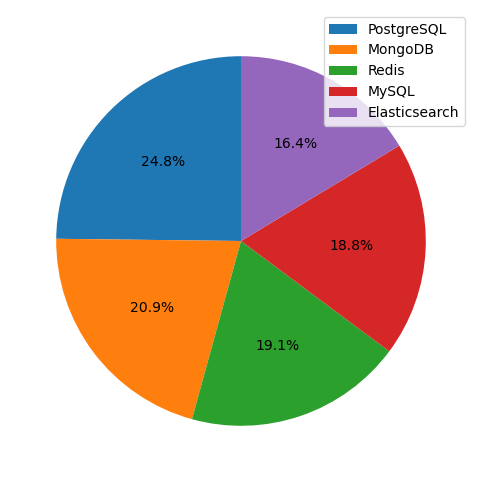

In [108]:
# your code goes here

top5_db.squeeze().plot(kind='pie',
                       autopct='%1.1f%%',
             figsize=(10,6),
            startangle=90,
            labels=None)
plt.legend(labels=my_list)
plt.ylabel(None)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [210]:
#RELOAD DB AFTER PIE CHART
QUERY = """
SELECT * from 'master'
"""

df = pd.read_sql_query(QUERY, conn)

In [115]:
df['Age_mask'] = (df['Age'] >= 30) & (df['Age'] < 36)


In [117]:
df_filtered = df[df['Age_mask']]


In [118]:
df_grouped_by_work = df_filtered.groupby('Age')['WorkWeekHrs'].median()
df_grouped_by_rev = df_filtered.groupby('Age')['CodeRevHrs'].median()

In [119]:
df_grouped_by_work

Age
30.0    40.0
31.0    40.0
32.0    40.0
33.0    40.0
34.0    40.0
35.0    40.0
Name: WorkWeekHrs, dtype: float64

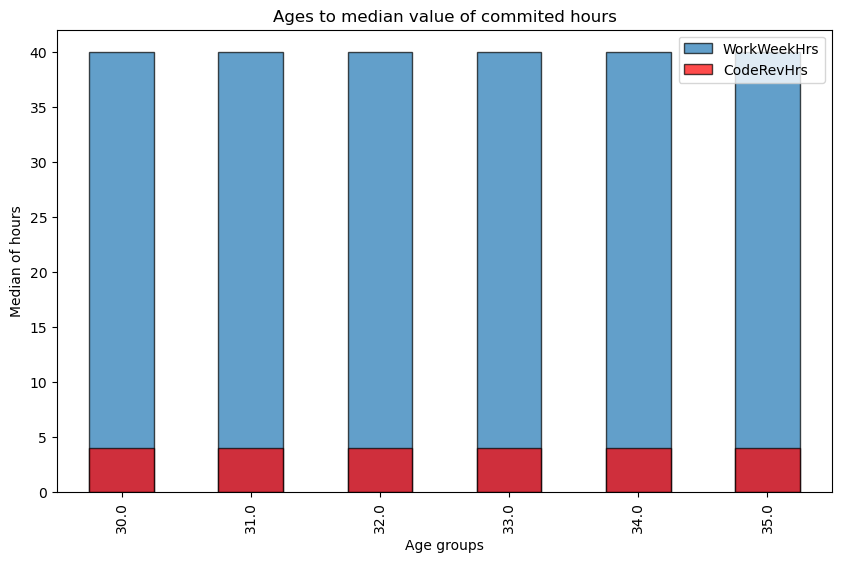

In [121]:
# your code goes here


bins = range(30,36)
ax0 = df_grouped_by_work.plot(kind='bar',
                         figsize=(10,6),
                         alpha=0.7, 
                         edgecolor = 'black'
                             )

ax1 = df_grouped_by_rev.plot(kind='bar',
                         figsize=(10,6),
                         alpha=0.7, 
                         edgecolor = 'black',
                         color='red',
                         ax=ax0
                            )

ax0.set_xlabel('Age groups')
ax0.set_ylabel('Median of hours')
ax0.set_title('Ages to median value of commited hours') 
ax0.legend(['WorkWeekHrs', 'CodeRevHrs'], loc='upper right')

        


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [211]:
# your code goes here
series_mask = (df['Age'] >= 25) & (df['Age'] < 30) 
df_cc_filt = df[series_mask].groupby('Age')['ConvertedComp'].median()


Text(0.5, 1.0, 'Compensation to age')

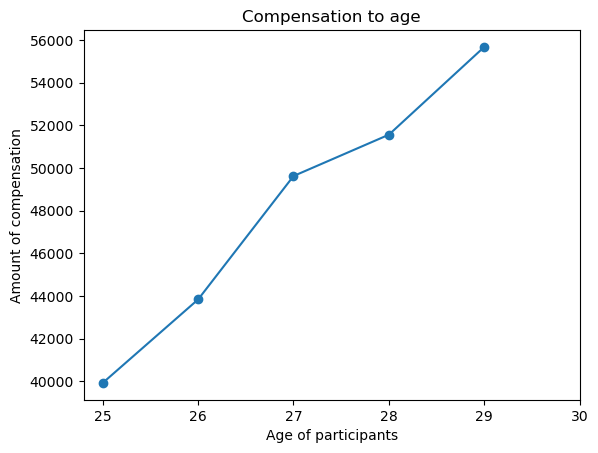

In [213]:
df_cc_filt.plot(kind="line",
               xticks=range(25,31),
               marker='o'
               )
plt.xlabel('Age of participants')
plt.ylabel('Amount of compensation')
plt.title('Compensation to age')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

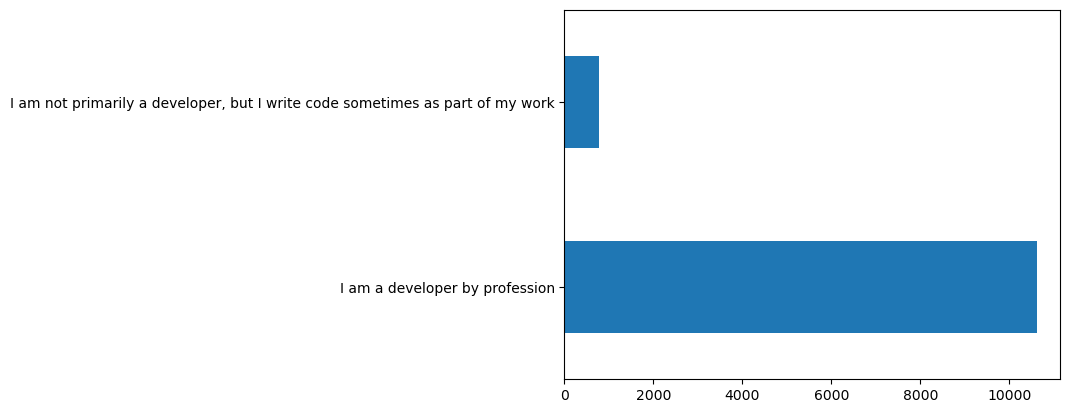

In [124]:
df['MainBranch'].value_counts().plot(kind='barh')

In [129]:
#SOLUTION FOR MORE ELEGANT APPROACH
dummies = pd.get_dummies(df['MainBranch'])

In [136]:
dummies.rename(columns=({'I am not primarily a developer, but I write code sometimes as part of my work': 'Sometimes writing'}), inplace=True)

<AxesSubplot:>

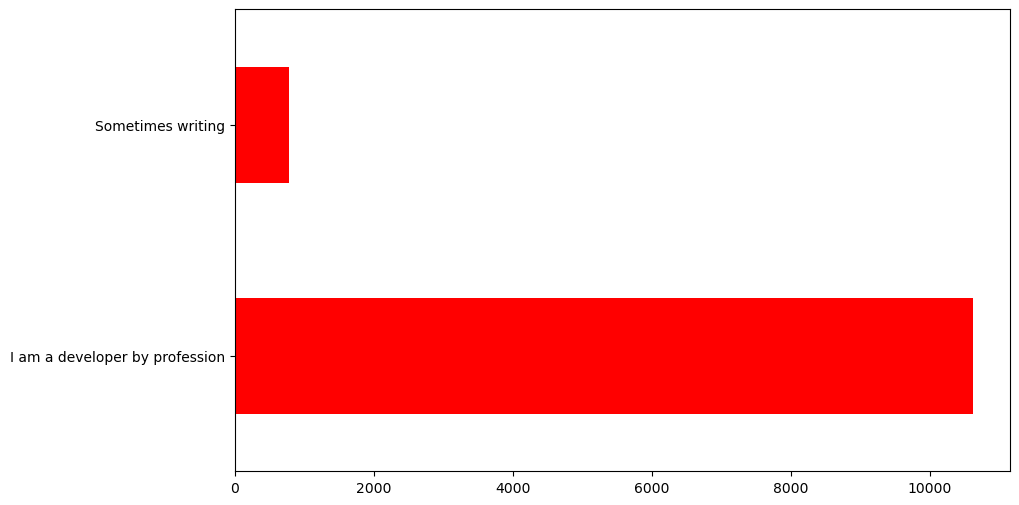

In [137]:
dummies.sum().plot(kind='barh',
                  figsize=(10,6),
                  color='red')

In [221]:
df.to_csv('my_file.csv')

Close the database connection.


In [222]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
